In [ ]:
# Load Libraries
import os
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.applications import vgg16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Load images
import random
def load_im():
    input_im, input_label = [], []
    resize = (224, 224)
    # Loop in folders
    for dirname, _, filenames in os.walk('/content/drive/MyDrive/ProjectSettleMint/v2'):
        random.shuffle(filenames)
        filenames = filenames[:700]
        for filename in filenames:
            photo_path = os.path.join(dirname, filename)
            photo_class = dirname.split('/')[-1]
            try:
                read_im = cv2.imread(photo_path)
                input_im.append(cv2.resize(read_im, resize))
                # potholes == 1
                if photo_class == 'noWaterV1':
                    input_label.append(1)
                # normal == 0
                elif photo_class == 'water':
                    input_label.append(0)
            except:
                print(photo_path)
    # return list of images and another list of correponding labels
    return input_im, input_label

input_im, input_label = load_im()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    np.array(input_im), np.array(input_label), test_size=0.3, random_state=26,shuffle=True)


# # Split training data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=36 , shuffle = True)

train_x, test_x, train_y, test_y, = X_train, X_test, y_train, y_test

In [ ]:


def append_im(input_im, input_label, im_iterator):
    input_label_n = input_label.copy()
    input_im_n = input_im.copy()
    for i in range(len(im_iterator)):
        im = im_iterator[i]
        im = im.astype('uint8')
        im_lbl = [input_label[i]]
        input_im_n = np.append(input_im_n, im, axis = 0)
        input_label_n = np.append(input_label_n, im_lbl, axis = 0)
    return input_im_n, input_label_n



In [ ]:
# len(im_iterator) , len(input_label)

In [ ]:
# Flipping
flip_data_generator = ImageDataGenerator(horizontal_flip = True)
im_iterator = flip_data_generator.flow(train_x, batch_size = 1, shuffle = False)
input_im_n, input_label_n = append_im(train_x, train_y, im_iterator)


In [ ]:


# Reshape
nx, ny, nz = train_x.shape[1], train_x.shape[2], train_x.shape[3]
train_x_nn, test_x_nn = input_im_n, test_x
train_x = input_im_n.reshape((input_im_n.shape[0], nx * ny * nz)) / 255
test_x = test_x.reshape((test_x.shape[0], nx * ny * nz)) / 255
train_y = input_label_n.reshape((input_label_n.shape[0], 1)) 
test_y = test_y.reshape((test_y.shape[0], 1)) 


del input_im_n
del input_label_n

In [ ]:
from tensorflow import keras


In [ ]:
def CNN():
    CNN_model = Sequential()
    
    CNN_model.add(Conv2D(filters = 96, input_shape = (224, 224, 3), kernel_size = (11, 11), strides = (4, 4), padding = 'valid'))
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    
    CNN_model.add(Conv2D(filters = 256,  kernel_size = (5, 5), strides = (1, 1), padding = 'valid'))
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    
    CNN_model.add(Flatten())
    CNN_model.add(Dense(512))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Dense(256))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Dense(1, activation = 'sigmoid'))
    
    return CNN_model

# Compile Model
cnn_model = CNN()
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [ ]:
cnn_model.fit(train_x_nn/255, train_y, batch_size = 64, epochs = 15, verbose = 1)

Epoch 1/15
31/31 [==============================] - 14s 68ms/step - loss: 0.7903 - accuracy: 0.5653
Epoch 2/15
31/31 [==============================] - 1s 42ms/step - loss: 0.4429 - accuracy: 0.8112
Epoch 3/15
31/31 [==============================] - 1s 40ms/step - loss: 0.3253 - accuracy: 0.8592
Epoch 4/15
31/31 [==============================] - 1s 41ms/step - loss: 0.2579 - accuracy: 0.8898
Epoch 5/15
31/31 [==============================] - 1s 41ms/step - loss: 0.2179 - accuracy: 0.9077
Epoch 6/15
31/31 [==============================] - 1s 40ms/step - loss: 0.1339 - accuracy: 0.9469
Epoch 7/15
31/31 [==============================] - 1s 40ms/step - loss: 0.0905 - accuracy: 0.9648
Epoch 8/15
31/31 [==============================] - 1s 40ms/step - loss: 0.0473 - accuracy: 0.9862
Epoch 9/15
31/31 [==============================] - 1s 40ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 10/15
31/31 [==============================] - 2s 55ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 11

In [ ]:
print(cnn_model.metrics_names)
print(cnn_model.evaluate(test_x_nn/255, test_y, verbose = 0))

['loss', 'accuracy']
[0.5249035358428955, 0.8952381014823914]


In [ ]:
pred = cnn_model.predict(test_x_nn/255)

14/14 [==============================] - 0s 17ms/step


In [ ]:
pred =  (pred > 0.5).astype(int)
pred = pred.ravel()

In [ ]:
from sklearn.metrics import classification_report
target_labels = ['Water' ,'noWater']
print(classification_report(test_y, pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       214
           1       0.91      0.88      0.89       206

    accuracy                           0.90       420
   macro avg       0.90      0.89      0.90       420
weighted avg       0.90      0.90      0.90       420



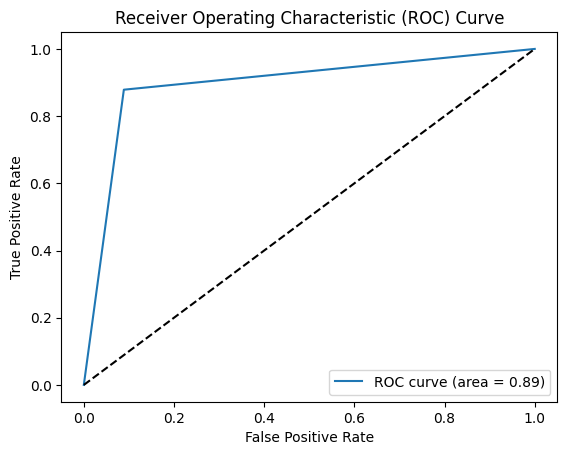

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# assuming y_test contains the true labels and y_pred contains the predicted probabilities of class 1
fpr, tpr, thresholds = roc_curve(test_y, pred)
roc_auc = roc_auc_score(test_y, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
# cnn_model.save('/content/drive/MyDrive/ProjectSettleMint/model_cnn_2')
# cnn_model = keras.models.load_model("/content/drive/MyDrive/ProjectSettleMint/model_cnn_1")


In [1]:
# url = \
# 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ25RbHU5on7xswnSjR85XC7gbNlRfrtdT7Sw&usqp=CAU'

In [2]:
# import urllib.request
# import numpy as np
# # URL of the image to read

# # read the image from the URL
# with urllib.request.urlopen(url) as url_response:
#     s = url_response.read()

# # convert the image bytes to a numpy array
# arr = np.asarray(bytearray(s), dtype=np.uint8)
# resize = (224, 224)

# # decode the numpy array as an OpenCV image
# img = cv2.imdecode(arr, cv2.IMREAD_UNCHANGED)
# imgg = cv2.resize(img, resize)
# imgg1 = imgg.reshape(-1,224,224,3)
# # cv2_imshow(img)

In [3]:
# photo_path = '/content/drive/MyDrive/carsData/6070519abaef3f56aa24cf39/scraped_FNoCNv_1617825231270.jpg'
# imgg = cv2.imread(photo_path)


# cnn_model.predict(imgg1/255.0)

In [4]:
# from google.colab.patches import cv2_imshow

In [5]:
# cv2_imshow(imgg)